In [1]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization
import visualkeras

In [2]:
labels_csv = pd.read_csv('labels.csv')
labels_csv["id"] = [fname + ".jpg" for fname in labels_csv["id"]]
data_train = pathlib.Path('train')
data_test = pathlib.Path('test')

In [7]:
batch_size = 16
img_size = 224

In [8]:
datagen = ImageDataGenerator(preprocessing_function = keras.applications.inception_v3.preprocess_input, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

validation_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="validation",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [9]:
base = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(224,224,3))

for layer in base.layers:
    layer.trainable=False

model = Sequential()
model.add(base)
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 batch_normalization_189 (Ba  (None, 5, 5, 2048)       8192      
 tchNormalization)                                               
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_3 (Dropout)         (None, 1024)             

In [10]:
history_inc = model.fit(train_generator, epochs=20, verbose = 1,
                        validation_data=validation_generator)

Epoch 1/20
512/512 [==============================] - 18s 30ms/step - loss: 2.8610 - accuracy: 0.3908 - val_loss: 0.8660 - val_accuracy: 0.7759
Epoch 2/20
512/512 [==============================] - 14s 28ms/step - loss: 1.1249 - accuracy: 0.7069 - val_loss: 0.6847 - val_accuracy: 0.8019
Epoch 3/20
512/512 [==============================] - 14s 27ms/step - loss: 0.8602 - accuracy: 0.7607 - val_loss: 0.6607 - val_accuracy: 0.7994
Epoch 4/20
512/512 [==============================] - 14s 27ms/step - loss: 0.7578 - accuracy: 0.7775 - val_loss: 0.6496 - val_accuracy: 0.8082
Epoch 5/20
512/512 [==============================] - 14s 28ms/step - loss: 0.6936 - accuracy: 0.7964 - val_loss: 0.6500 - val_accuracy: 0.8077
Epoch 6/20
512/512 [==============================] - 14s 27ms/step - loss: 0.6134 - accuracy: 0.8107 - val_loss: 0.6524 - val_accuracy: 0.8112
Epoch 7/20
512/512 [==============================] - 14s 27ms/step - loss: 0.5891 - accuracy: 0.8174 - val_loss: 0.6546 - val_accuracy:

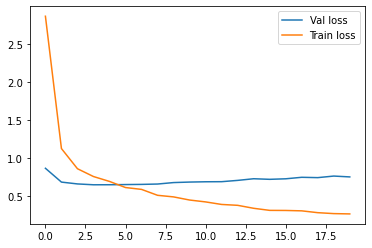

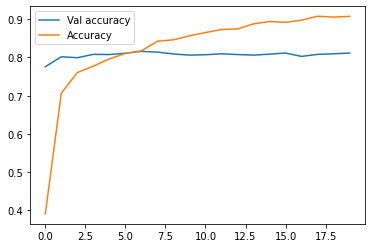

In [11]:
plt.figure()
plt.plot(history_inc .history["val_loss"], label = "Val loss")
plt.plot(history_inc .history["loss"], label = "Train loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_inc .history["val_accuracy"], label = "Val accuracy")
plt.plot(history_inc .history["accuracy"], label = "Accuracy")
plt.legend()
plt.show()

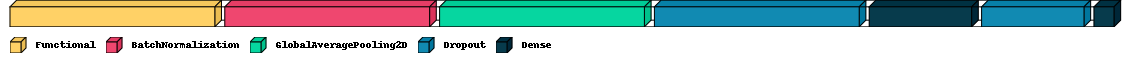

In [12]:
visualkeras.layered_view(model,  legend=True)